In [21]:
# Stephen.Griffies@noaa.gov 

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob 
import mplsettings


import cartopy.crs as ccrs

%matplotlib inline

In [23]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [24]:
# datasets for p125
staticp125 = xr.open_mfdataset("../../common/CM4X_p125/ocean_annual.static.nc")
#staticp125  = xr.open_mfdataset("/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc")

dsp125      = xr.open_mfdataset("CM4Xp125_sst_change.nc")
sst_change_p125 = dsp125['thetao']

areap125              = staticp125['areacello'] * staticp125['wet']
total_ocean_area_p125 = areap125.sum(dim=('xh', 'yh'))

In [25]:
# datasets for p25
#staticp25  = xr.open_mfdataset("/net/smg/OWG/CM4_highres/grids/p25/ocean_annual.static.nc")
staticp25 = xr.open_mfdataset("../../common/CM4X_p25/ocean_annual.static.nc")

dsp25      = xr.open_mfdataset("CM4Xp25_sst_change.nc")
sst_change_p25 = dsp25['thetao']

areap25              = staticp25['areacello'] * staticp25['wet']
total_ocean_area_p25 = areap25.sum(dim=('xh', 'yh'))

In [26]:
# datasets for p125
#static4p0   = xr.open_mfdataset("/net/smg/OWG/CM4_highres/grids/p25/ocean_annual.static.nc")
static4p0 = xr.open_mfdataset("../../common/CM4X_p25/ocean_annual.static.nc")

ds4p0       = xr.open_mfdataset("CM4p0_sst_change.nc")
sst_change_4p0  = ds4p0['thetao']

area4p0               = static4p0['areacello'] * static4p0['wet']
total_ocean_area_4p0  = area4p0.sum(dim=('xh', 'yh'))

In [27]:
sst_change_mean_4p0 = (sst_change_4p0 * area4p0).sum(dim=('xh', 'yh')) / total_ocean_area_4p0
sst_change_sq_4p0   = sst_change_4p0 * sst_change_4p0
sst_sigma_4p0       = np.sqrt( (sst_change_sq_4p0 * area4p0).sum(dim=('xh', 'yh')) / total_ocean_area_4p0 )
sst_change_max_4p0  = np.max(sst_change_4p0)
sst_change_min_4p0  = np.min(sst_change_4p0)

print('sst_change_mean_4p0 (deg C) = ',sst_change_mean_4p0.values,'  and sst_sigma (deg C)    = ',sst_sigma_4p0.values)
print('sst_change_max_4p0  (deg C) = ',sst_change_max_4p0.values,'   and sst_change_min (deg C) = ',sst_change_min_4p0.values)

sst_change_mean_4p0 (deg C) =  3.070782   and sst_sigma (deg C)    =  3.261287
sst_change_max_4p0  (deg C) =  9.833963    and sst_change_min (deg C) =  -1.6370617


In [28]:
sst_change_mean_p125 = (sst_change_p125 * areap125).sum(dim=('xh', 'yh')) / total_ocean_area_p125
sst_change_sq_p125   = sst_change_p125 * sst_change_p125
sst_sigma_p125       = np.sqrt( (sst_change_sq_p125 * areap125).sum(dim=('xh', 'yh')) / total_ocean_area_p125 )
sst_change_max_p125  = np.max(sst_change_p125)
sst_change_min_p125  = np.min(sst_change_p125)

print('sst_change_mean_p125 (deg C) = ',sst_change_mean_p125.values,'  and sst_sigma_p125 (deg C)      = ',sst_sigma_p125.values)
print('sst_change_max_p125  (deg C) = ',sst_change_max_p125.values,'   and sst_change_min_p125 (deg C) = ',sst_change_min_p125.values)

sst_change_mean_p125 (deg C) =  3.0740714   and sst_sigma_p125 (deg C)      =  3.219931
sst_change_max_p125  (deg C) =  9.796709    and sst_change_min_p125 (deg C) =  -1.1840324


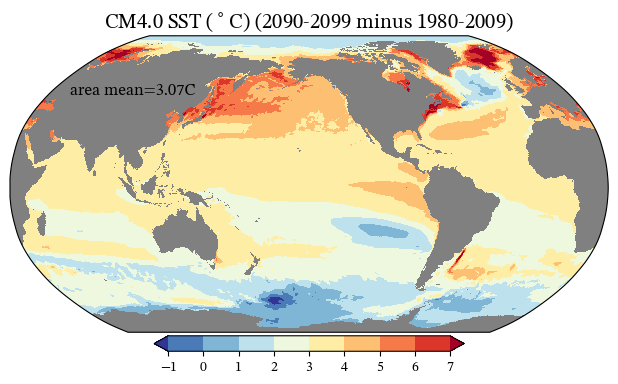

In [29]:
field = sst_change_4p0
clevels = [-1, 0, 1, 2, 3, 4, 5, 6]
levels = [-1, -.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
levels = [-1, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
levels = [-1, 1, 3, 5, 7]
#levels = [-4, -3.5, -3, -2.5, -2, -1.5, 0, 1.5, 2, 2.5, 3, 3.5, 4]
levels = [-1, 0, 1, 2, 3, 4, 5, 6]
#levels = [-2, 0, 2, 3, 4, 5]
levels = [-1, 0, 1, 2, 3, 4, 5, 6, 7]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
#                     cmap=cmocean.cm.gray,
#                     cmap=cmocean.cm.amp,
#                     cmap=cmocean.cm.balance,
                     add_colorbar=False,
                     levels=levels,
            )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title(r'CM4.0 SST ($^\circ$C) (2090-2099 minus 1980-2009)', fontsize=15)
axis.text(.1,.8,f"area mean={sst_change_mean_4p0.values:.2f}C",transform=axis.transAxes,fontsize=12,color='black')

cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=False, shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig15_CM4p0_SST_change.jpg', format = 'jpeg', bbox_inches='tight', dpi=400)

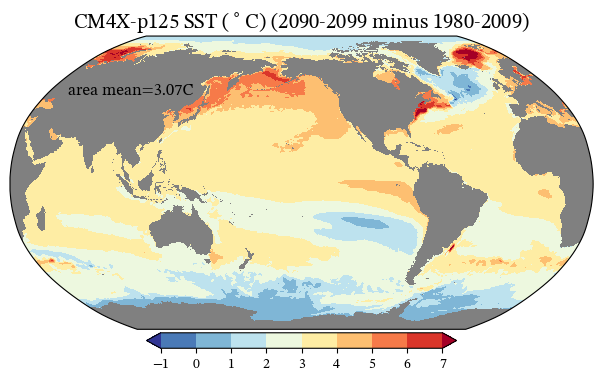

In [30]:
field = sst_change_p125
clevels = [-1, 0, 1, 2, 3, 4, 5, 6]
levels = [-1, -.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
levels = [-1, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
levels = [-1, 1, 3, 5, 7]
#levels = [-4, -3.5, -3, -2.5, -2, -1.5, 0, 1.5, 2, 2.5, 3, 3.5, 4]
levels = [-1, 0, 1, 2, 3, 4, 5, 6]
#levels = [-2, 0, 2, 3, 4, 5]
levels = [-1, 0, 1, 2, 3, 4, 5, 6, 7]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
#                     cmap=cmocean.cm.gray,
#                     cmap=cmocean.cm.amp,
#                     cmap=cmocean.cm.balance,
                     add_colorbar=False,
                     levels=levels,
            )


#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title(r'CM4X-p125 SST ($^\circ$C) (2090-2099 minus 1980-2009)', fontsize=15)
axis.text(.1,.8,f"area mean={sst_change_mean_4p0.values:.2f}C",transform=axis.transAxes,fontsize=12,color='black')

cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=False, shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig15_CM4X_p125_SST_change.jpg', format = 'jpeg', bbox_inches='tight', dpi=400)

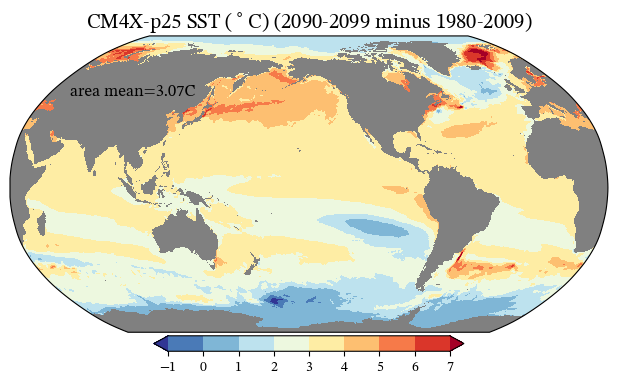

In [31]:
field = sst_change_p25
clevels = [-1, 0, 1, 2, 3, 4, 5, 6]
levels = [-1, -.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
levels = [-1, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
levels = [-1, 1, 3, 5, 7]
#levels = [-4, -3.5, -3, -2.5, -2, -1.5, 0, 1.5, 2, 2.5, 3, 3.5, 4]
levels = [-1, 0, 1, 2, 3, 4, 5, 6]
#levels = [-2, 0, 2, 3, 4, 5]
levels = [-1, 0, 1, 2, 3, 4, 5, 6, 7]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
#                     cmap=cmocean.cm.gray,
#                     cmap=cmocean.cm.amp,
#                     cmap=cmocean.cm.balance,
                     add_colorbar=False,
                     levels=levels,
            )


#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title(r'CM4X-p25 SST ($^\circ$C) (2090-2099 minus 1980-2009)', fontsize=15)
axis.text(.1,.8,f"area mean={sst_change_mean_4p0.values:.2f}C",transform=axis.transAxes,fontsize=12,color='black')

cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=False, shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig15_CM4X_p25_SST_change.jpg', format = 'jpeg', bbox_inches='tight', dpi=400)